1)

Rolling to 7 is more probable, as there are more microstates that result in this outcome, whereas for snake eyes, there is only one possible roll that can result in this state.

In [1]:
prob_snake = 1/36
prob_seven = 1/6 # 6 possible states that add up to 7, 1 and 6, 6 and 1, 2 and 5, etc. microstates/macrostates = 6/36 = 1/6
ratio = prob_seven/prob_snake
print(ratio)

6.0


In [2]:
#2
def analytical_sum(target):
    z = abs(7 - target)
    return (6 - z)/36

In [3]:
analytical_sum(7)

0.16666666666666666

In [4]:
total = sum([analytical_sum(x) for x in range(2, 13)])
print(total)

1.0000000000000002


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

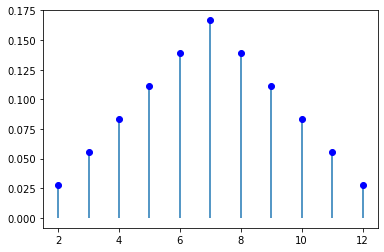

In [6]:
x = range(2, 13)
y = [analytical_sum(i) for i in x]
fig, ax = plt.subplots(1, 1)
ax.plot(x,y, 'bo')
ax.vlines(x, 0, y)

In [7]:
# 3: Mean is 7 by inspection
def variance(num_rolls):
    e1 = sum(range(1,7))/6
    e2 = sum([x**2 for x in range(1, 7)])/6
    
    res = e2 - e1**2
    return num_rolls * res

In [8]:
print(variance(1))
# Variance of one dice roll is 2.917, and the variance of the sum of
# two independent variables is the sum of their variances, so:
print(variance(2)) # should be the variance of our distribution.

2.916666666666666
5.833333333333332


In [23]:
#4
odds = np.ones(6)*(1/6)
temp = odds
for x in range(9):
    odds = np.convolve(odds, temp)
print(sum(odds))

0.9999999999999997


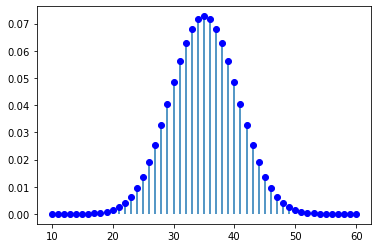

In [24]:
x = range(10, 61)
y = odds
plt.plot(x, y, 'bo')
plt.vlines(x, 0 ,y)

It looks pretty gaussian to me and highly convolved distributions should eventually become gaussian so from a quick glance I would say yes it's gaussian.

In [25]:
#Let's use the 10 conv plot as our inital gaussian distribution.
for x in range(50):
    odds = np.convolve(odds, temp)
print(sum(odds))
print(len(odds))
print(max(odds))

0.9999999999999968
301
0.030077428508415927


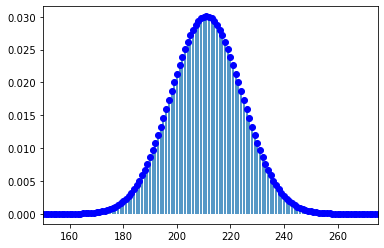

In [29]:
x = np.array(range(61, 362))

plt.xlim([150, 275])
plt.plot(x, odds, 'bo')
plt.vlines(x, 0, odds)

In [30]:
# The distribution here representing the sums for 60 dice is clearly Gaussian, with variance:
print(variance(60))

174.99999999999997


While the variance increases linearly, it's important to note that over time, the standard deviation does not. This is due to the relationship between standard deviation and variance. Since the variance is equal to the standard deviation squared, while the variance increases linearly, the standard deviation will increase as $\sqrt{n}$. So if you integrate/convolute over a long period of time, the standard deviation will change very slowly if at all.